## 1. Importing libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import os

## 2. Import datasets

In [2]:
def get_data(name):
    # Check if the dataset directory exists
    current_dir = os.getcwd()
    print("Current directory:", current_dir)

    if current_dir == "/Users/sudhirjoon/Library/Mobile Documents/com~apple~CloudDocs/Uni_Mannheim/Sem2/Machine Learning zoomcamp/MLZoomcamp":
        print("Dataset directory is correct.")
    else:
        # change directory
        current_dir = os.chdir('/Users/sudhirjoon/Library/Mobile Documents/com~apple~CloudDocs/Uni_Mannheim/Sem2/Machine Learning zoomcamp/MLZoomcamp')
        print("Current directory updated")

    # Check if the file exists
    data_path = "Midterm Project/German Real State Project/Data"
    file_name = f"{name}.csv"
    file_path = os.path.join(current_dir, data_path,file_name)
    return pd.read_csv(file_path)

In [4]:
data = get_data('immo_data')
data.shape

Current directory: /Users/sudhirjoon/Library/Mobile Documents/com~apple~CloudDocs/Uni_Mannheim/Sem2/Machine Learning zoomcamp/MLZoomcamp
Dataset directory is correct.


(268850, 49)

In [5]:
data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

- The dataser contains 268850 rows and 11 features
- The datatypes of some features isn't appropiate
- Most of the features contains have missing values

## 3. Preliminary Analysis

### 3.1 Check for data types

In [7]:
# Objetc data types
data.select_dtypes(include='object').shape[1]

19

There are 19 columns has datatype object 

In [8]:
(
    (
    data.select_dtypes(include='object')
    .isna()
    .sum()/len(data.select_dtypes(include='object'))*100
    )
    .sort_values(ascending=False)
    .round(2)
)

energyEfficiencyClass    71.07
petsAllowed              42.62
interiorQual             41.91
houseNumber              26.42
streetPlain              26.41
condition                25.47
firingTypes              21.19
facilities               19.69
heatingType              16.68
typeOfFlat               13.62
telekomTvOffer           12.13
description               7.34
regio3                    0.00
regio1                    0.00
regio2                    0.00
street                    0.00
geo_krs                   0.00
geo_bln                   0.00
date                      0.00
dtype: float64

energyEfficincy class has 71.07 null values present 

### 3.2 Check for duplicates

In [9]:
data.duplicated().sum()

0

There are no duplicates in the dataset 

## 4. Detailed Analysis

### 4.1 Categorical Features

#### Energy Efficincy Class

In [10]:
(
    data['energyEfficiencyClass']
    .value_counts(normalize = True,dropna=False)*100
)

energyEfficiencyClass
NaN               71.066766
C                  5.435373
NO_INFORMATION     5.255719
D                  5.179468
B                  4.215362
E                  2.970802
A                  1.855310
F                  1.667845
A_PLUS             1.345732
G                  0.671750
H                  0.335875
Name: proportion, dtype: float64

- There are 71% values are NA and 5% of column do not have th information about energy efficiency, so in total we have ca. 76% of column do not have th information about energy efficiency. Therefore we will drop this column

#### Pets Allowed

In [11]:
(
    data['petsAllowed']
    .value_counts(normalize = True,dropna=False)*100
)

petsAllowed
NaN           42.615957
negotiable    34.208667
no            19.338293
yes            3.837084
Name: proportion, dtype: float64

In [12]:
# Replace NaN with "unknown"
data['petsAllowed'] = data['petsAllowed'].fillna('unknown')
(
    data['petsAllowed']
    .value_counts(normalize = True,dropna=False)*100
)

petsAllowed
unknown       42.615957
negotiable    34.208667
no            19.338293
yes            3.837084
Name: proportion, dtype: float64

#### interiorQual

In [13]:
(
    data['interiorQual']
    .value_counts(normalize = True,dropna=False)*100
)

interiorQual
NaN              41.906267
normal           30.435559
sophisticated    24.088525
luxury            2.844709
simple            0.724940
Name: proportion, dtype: float64

In [14]:
# Replace NaN with "unknown"
data['interiorQual'] = data['interiorQual'].fillna('unknown')
(
    data['interiorQual']
    .value_counts(normalize = True,dropna=False)*100
)

interiorQual
unknown          41.906267
normal           30.435559
sophisticated    24.088525
luxury            2.844709
simple            0.724940
Name: proportion, dtype: float64

#### houseNumber

In [15]:
(
    data['houseNumber']
    .value_counts(normalize = True,dropna=False)*100
)

houseNumber
NaN           26.415473
1              2.668031
2              2.524828
4              2.165892
3              2.123861
                ...    
45/0302        0.000372
11/0102        0.000372
2,33           0.000372
7/9 WE 67      0.000372
32 (WE 66)     0.000372
Name: proportion, Length: 5511, dtype: float64

- houseNumber do not effect the house price so much and it has more than 42% NaN values therefore we drop the houseNumber column from dataset

#### streetPlain

In [16]:
(
    data['streetPlain']
    .value_counts(normalize = True,dropna=False)*100
)

streetPlain
NaN                      26.413614
Hauptstraße               0.338851
Bahnhofstraße             0.310210
Leipziger_Straße          0.159197
Goethestraße              0.151014
                           ...    
Schneewittchenstrasse     0.000372
Heidlohstr.               0.000372
Tulbeckstr.               0.000372
Heissmannsweg             0.000372
Robert-Dißmann-Str.       0.000372
Name: proportion, Length: 54491, dtype: float64

- streetPlain do not effect the house price so much and it has more than 26% NaN values therefore we drop the streetPlain column from dataset

#### Condition

In [17]:
(
    data['condition']
    .value_counts(normalize = True,dropna=False)*100
)

condition
NaN                                   25.474800
well_kept                             24.768830
refurbished                           10.029384
fully_renovated                        9.807699
first_time_use                         8.167752
mint_condition                         8.159940
modernized                             6.407290
first_time_use_after_refurbishment     5.839316
negotiable                             0.833178
need_of_renovation                     0.510322
ripe_for_demolition                    0.001488
Name: proportion, dtype: float64

In [18]:
data['condition'] = data['condition'].fillna('unknown')
(
    data['condition']
    .value_counts(normalize = True, dropna=False)*100
)

condition
unknown                               25.474800
well_kept                             24.768830
refurbished                           10.029384
fully_renovated                        9.807699
first_time_use                         8.167752
mint_condition                         8.159940
modernized                             6.407290
first_time_use_after_refurbishment     5.839316
negotiable                             0.833178
need_of_renovation                     0.510322
ripe_for_demolition                    0.001488
Name: proportion, dtype: float64

#### firingTypes

In [19]:
(
    data['firingTypes']
    .value_counts(normalize = True,dropna=False)*100
)

firingTypes
gas                                                                                                  41.249396
NaN                                                                                                  21.188023
district_heating                                                                                     18.370467
oil                                                                                                   6.746141
natural_gas_light                                                                                     3.749303
                                                                                                       ...    
geothermal:solar_heating:pellet_heating:gas                                                           0.000372
gas:oil:electricity                                                                                   0.000372
district_heating:combined_heat_and_power_fossil_fuels:combined_heat_and_power_regenerative_energy   

- Assign NaN values only to the top 4 categories based on their value counts (while ignoring the rest of the categories)

In [20]:
# Calculate the value counts for the column, excluding NaN
value_counts = data['firingTypes'].value_counts(normalize=True)

# Get the top 4 categories
top_4_categories = value_counts.head(4).index
print("Top 4 categories:", top_4_categories)

# Filter the rows with NaN values
nan_indices = data['firingTypes'][data['firingTypes'].isna()].index

# Handle the case where there are no NaN values
if len(nan_indices) > 0:
    # Normalize probabilities to sum to 1
    probabilities = value_counts.loc[top_4_categories].values
    probabilities = probabilities / probabilities.sum()  # Ensure sum of probabilities = 1

    # Assign NaN values to top 4 categories proportionally
    data.loc[nan_indices, 'firingTypes'] = np.random.choice(
        top_4_categories, 
        size=len(nan_indices), 
        p=probabilities,  # Use normalized probabilities
        replace=True  # Ensure sampling with replacement
    )
else:
    print("No NaN values found in 'firingTypes' column.")


Top 4 categories: Index(['gas', 'district_heating', 'oil', 'natural_gas_light'], dtype='object', name='firingTypes')


In [21]:
(
    data['firingTypes']
    .value_counts(normalize = True,dropna=False)*100
)

firingTypes
gas                                                                                                  53.713223
district_heating                                                                                     23.992933
oil                                                                                                   8.743909
natural_gas_light                                                                                     4.853264
electricity                                                                                           1.799516
                                                                                                       ...    
geothermal:solar_heating:pellet_heating:gas                                                           0.000372
gas:oil:electricity                                                                                   0.000372
district_heating:combined_heat_and_power_fossil_fuels:combined_heat_and_power_regenerative_energy   

#### facilities

In [22]:
(
    data['facilities']
    .value_counts(normalize = True,dropna=False)*100
)

facilities
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       19.685326
Laminat                                                                                  

In [23]:
(
    data['facilities']
    .head(20)
)

0     Die Wohnung ist mit Laminat ausgelegt. Das Bad...
1                                                   NaN
2     * 9 m² Balkon\n* Bad mit bodengleicher Dusche,...
3                                                   NaN
4     Diese Wohnung wurde neu saniert und ist wie fo...
5     helle ebenerdige 2 Zi. Wohnung mit Terrasse, h...
6                                                   NaN
7     Rollläden; Warmwasserbereiter; Kellerraum; Gas...
8                     Parkett, Einbauküche, kein Balkon
9     In Ihrem neuen Zuhause können Sie nach wenigen...
10                                                  NaN
11    - Wohnzimmer mit Laminatboden\n- Tageslichtbad...
12    Die Charakteristiken des Jugendstils wurden li...
13    Die Wohnung wird vor der Neuvermietung hochwer...
14    Fußbodenheizung, hochwertiger Bodenbelag Parke...
15    Die Wohnung verfügt über eine separate Küche m...
16                         Fliesenböden in allen Räumen
17                                              

- droping the facilities column for now , as we need the NLP analysis on the column to extract the features from the description of the facility. This is out of scope for this project.

#### heatingType

In [24]:
(

    data['heatingType']
    .value_counts(normalize = True,dropna=False)*100
)

heatingType
central_heating                   47.973591
NaN                               16.684397
district_heating                   9.227450
gas_heating                        7.422354
self_contained_central_heating     7.099498
floor_heating                      6.582481
oil_heating                        1.875395
heat_pump                          1.018040
combined_heat_and_power_plant      0.735726
night_storage_heater               0.498791
wood_pellet_heating                0.357448
electric_heating                   0.335131
stove_heating                      0.127952
solar_heating                      0.061744
Name: proportion, dtype: float64

In [25]:
# Get the normalized value counts for 'heatingType' including NaN
value_counts = data['heatingType'].value_counts(normalize=True, dropna=False)

# Separate the NaN values
nan_count = value_counts.get(np.nan, 0) 
print(f"nan_count: {nan_count} \n" )

# Remove the NaN category from value_counts to distribute its proportion
non_nan_value_counts = value_counts.dropna()

# Normalize the remaining proportions (ensure sum is 1)
normalized_non_nan_counts = non_nan_value_counts / non_nan_value_counts.sum()

# If there are NaN values, distribute them according to the normalized proportions
if nan_count > 0:
    # Calculate how many NaN values need to be distributed
    nan_indices = data['heatingType'][data['heatingType'].isna()].index
    num_nans = len(nan_indices)

    # Sample NaN values based on the normalized proportions
    sampled_values = np.random.choice(
        normalized_non_nan_counts.index, 
        size=num_nans, 
        p=normalized_non_nan_counts.values, 
        replace=True
    )

    # Assign the sampled values to the NaN indices
    data.loc[nan_indices, 'heatingType'] = sampled_values

# Now drop the NaN values (in case there are any left)
data = data.dropna(subset=['heatingType'])

# Verify the result
print(data['heatingType'].value_counts(normalize=True) * 100)

nan_count: 0.16684396503626558 

heatingType
central_heating                   57.483827
district_heating                  11.060571
gas_heating                        8.939276
self_contained_central_heating     8.534911
floor_heating                      7.918989
oil_heating                        2.276996
heat_pump                          1.226869
combined_heat_and_power_plant      0.882566
night_storage_heater               0.609418
wood_pellet_heating                0.429997
electric_heating                   0.403601
stove_heating                      0.155319
solar_heating                      0.077660
Name: proportion, dtype: float64


#### typeOfFlat

In [26]:
(
    data['typeOfFlat']
    .value_counts(normalize = True,dropna=False)*100
)

typeOfFlat
apartment              49.098880
NaN                    13.274062
roof_storey            13.013156
ground_floor           11.772515
other                   3.510752
maisonette              3.495449
raised_ground_floor     2.119764
penthouse               1.335516
terraced_flat           1.272394
half_basement           0.749817
loft                    0.357693
Name: proportion, dtype: float64

- 13.27% NaN values 

In [27]:
# Get the normalized value counts for 'heatingType' including NaN
value_counts = data['typeOfFlat'].value_counts(normalize=True, dropna=False)

# Separate the NaN values
nan_count = value_counts.get(np.nan, 0) 
print(f"nan_count: {nan_count} \n" )

# Remove the NaN category from value_counts to distribute its proportion
non_nan_value_counts = value_counts.dropna()

# Normalize the remaining proportions (ensure sum is 1)
normalized_non_nan_counts = non_nan_value_counts / non_nan_value_counts.sum()

# If there are NaN values, distribute them according to the normalized proportions
if nan_count > 0:
    # Calculate how many NaN values need to be distributed
    nan_indices = data['typeOfFlat'][data['typeOfFlat'].isna()].index
    num_nans = len(nan_indices)

    # Sample NaN values based on the normalized proportions
    sampled_values = np.random.choice(
        normalized_non_nan_counts.index, 
        size=num_nans, 
        p=normalized_non_nan_counts.values, 
        replace=True
    )

    # Assign the sampled values to the NaN indices
    data.loc[nan_indices, 'typeOfFlat'] = sampled_values

# Now drop the NaN values (in case there are any left)
data = data.dropna(subset=['typeOfFlat'])

# Verify the result
print(data['typeOfFlat'].value_counts(normalize=True) * 100)

nan_count: 0.1327406205886066 

typeOfFlat
apartment              56.632260
roof_storey            15.031356
ground_floor           13.551591
other                   4.047443
maisonette              4.027188
raised_ground_floor     2.441086
penthouse               1.544814
terraced_flat           1.463795
half_basement           0.855763
loft                    0.404705
Name: proportion, dtype: float64


#### telekomTvOffer

In [28]:
(
    data['telekomTvOffer']
    .value_counts(normalize = True,dropna=False)*100
)

telekomTvOffer
ONE_YEAR_FREE    84.710007
NaN              12.099092
NONE              1.841623
ON_DEMAND         1.349277
Name: proportion, dtype: float64

In [29]:
data['telekomTvOffer'] = data['telekomTvOffer'].fillna("unknown")
data['telekomTvOffer'] = data['telekomTvOffer'].replace("NONE","unknown")

(
    data['telekomTvOffer']
    .value_counts(normalize = True,dropna=False)*100
)


telekomTvOffer
ONE_YEAR_FREE    84.710007
unknown          13.940716
ON_DEMAND         1.349277
Name: proportion, dtype: float64

#### description

In [30]:
(
    data['description']
    .value_counts(normalize = True,dropna=False)*100
)

description
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                7.085654
saniertes Mehrfamilienhaus                                                                                                                                      

- droping the description column for now , as we need the NLP analysis on the column to extract the features from the description of the property. This is out of scope for this project.

In [31]:
(
    data
    .regio1
    .value_counts(normalize = True,dropna=False)*100
)

regio1
Nordrhein_Westfalen       23.648191
Sachsen                   21.447825
Bayern                     7.994781
Sachsen_Anhalt             7.376621
Hessen                     6.648230
Niedersachsen              6.205352
Baden_Württemberg          6.008258
Berlin                     3.923188
Rheinland_Pfalz            3.135979
Thüringen                  3.074826
Brandenburg                2.553266
Schleswig_Holstein         2.510420
Mecklenburg_Vorpommern     2.428622
Hamburg                    1.411989
Bremen                     1.101157
Saarland                   0.531297
Name: proportion, dtype: float64

#### geo_bln

In [32]:
(
    data
    .geo_bln
    .value_counts(normalize = True,dropna=False)*100
)

geo_bln
Nordrhein_Westfalen       23.648191
Sachsen                   21.447825
Bayern                     7.994781
Sachsen_Anhalt             7.376621
Hessen                     6.648230
Niedersachsen              6.205352
Baden_Württemberg          6.008258
Berlin                     3.923188
Rheinland_Pfalz            3.135979
Thüringen                  3.074826
Brandenburg                2.553266
Schleswig_Holstein         2.510420
Mecklenburg_Vorpommern     2.428622
Hamburg                    1.411989
Bremen                     1.101157
Saarland                   0.531297
Name: proportion, dtype: float64

#### geo_krs

In [33]:
(
    data
    .geo_krs
    .value_counts(normalize = True,dropna=False)*100
    
)

geo_krs
Leipzig                         5.079266
Chemnitz                        4.632883
Berlin                          3.923188
Dresden                         2.777626
Magdeburg                       1.818253
                                  ...   
Schwabach                       0.011296
Freyung_Grafenau_Kreis          0.010906
Haßberge_Kreis                  0.008959
Neustadt_a.d._Waldnaab_Kreis    0.005843
Kronach_Kreis                   0.004674
Name: proportion, Length: 419, dtype: float64

In [34]:
(
    data
    .select_dtypes(include = 'object')
    .columns
)

Index(['regio1', 'heatingType', 'telekomTvOffer', 'firingTypes', 'geo_bln',
       'houseNumber', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'typeOfFlat', 'regio2', 'regio3',
       'description', 'facilities', 'energyEfficiencyClass', 'date'],
      dtype='object')

#### street

In [35]:
(
    data
    .street
    .value_counts(normalize = True,dropna=False)*100
)

street
no_information                  26.374401
Hauptstra&szlig;e                0.354848
Bahnhofstra&szlig;e              0.319012
Leipziger Stra&szlig;e           0.165933
Goethestra&szlig;e               0.155027
                                  ...    
Angelburger Str.                 0.000390
Cornrad-Fromann-Stra&szlig;e     0.000390
Hansingstra&szlig;e              0.000390
Langendreerstr.                  0.000390
Robert-Di&szlig;mann-Str.        0.000390
Name: proportion, Length: 51301, dtype: float64

In [36]:
(
    data
    .select_dtypes(include = 'object')
    .columns
)

Index(['regio1', 'heatingType', 'telekomTvOffer', 'firingTypes', 'geo_bln',
       'houseNumber', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'typeOfFlat', 'regio2', 'regio3',
       'description', 'facilities', 'energyEfficiencyClass', 'date'],
      dtype='object')

#### regio1

In [37]:
data.regio1.value_counts()

regio1
Nordrhein_Westfalen       60712
Sachsen                   55063
Bayern                    20525
Sachsen_Anhalt            18938
Hessen                    17068
Niedersachsen             15931
Baden_Württemberg         15425
Berlin                    10072
Rheinland_Pfalz            8051
Thüringen                  7894
Brandenburg                6555
Schleswig_Holstein         6445
Mecklenburg_Vorpommern     6235
Hamburg                    3625
Bremen                     2827
Saarland                   1364
Name: count, dtype: int64

- regio1 refers to the german state names

#### regio2

In [38]:
(
    data
    .regio2
    .value_counts(normalize = True,dropna=False)*100
)

regio2
Leipzig                         5.079266
Chemnitz                        4.632883
Berlin                          3.923188
Dresden                         2.777626
Magdeburg                       1.818253
                                  ...   
Schwabach                       0.011296
Freyung_Grafenau_Kreis          0.010906
Haßberge_Kreis                  0.008959
Neustadt_a.d._Waldnaab_Kreis    0.005843
Kronach_Kreis                   0.004674
Name: proportion, Length: 419, dtype: float64

#### regio3

In [39]:
(
    data
    .regio3
    .value_counts(normalize = True,dropna=False)*100
)

regio3
Innenstadt          1.779301
Stadtmitte          1.003778
Altstadt            0.876018
Sonnenberg          0.706189
Kaßberg             0.631013
                      ...   
Bothenheilingen     0.000390
Mammendorf          0.000390
Vorderweidenthal    0.000390
Altusried           0.000390
Eberfing            0.000390
Name: proportion, Length: 8634, dtype: float64

In [40]:
data = data.rename(columns={'regio1': 'stateName',
                            'regio2': 'cityName',
                            'regio3':'cityDistrict'})

#### Drop the categorical columns after analysis 

In [41]:
data.shape

(256730, 49)

In [117]:
data.drop(['energyEfficiencyClass'],axis=1, inplace= True)
data.drop(['houseNumber'],axis=1, inplace= True)
data.drop(['streetPlain'],axis=1, inplace= True)
data.drop(['facilities'],axis=1, inplace= True)
data.drop(['description'],axis=1, inplace= True)
data.drop(['date'],axis=1, inplace= True)
data.drop(['street'],axis=1, inplace= True)
data.drop(['geo_bln'],axis=1, inplace= True) # geo_bln has same information as stateName
data.drop(['geo_krs'],axis=1, inplace= True) # geo_krs has same information as cityName
data.drop(['noRoomsRange'],axis=1, inplace= True) # noRooms has same information as noRoomsRange

In [43]:
data.shape

(256730, 40)

In [44]:
(
    data
    .select_dtypes(include=['object'])
    .head(2)
)

,stateName,heatingType,telekomTvOffer,firingTypes,condition,interiorQual,petsAllowed,typeOfFlat,cityName,cityDistrict
0,Nordrhein_Westfalen,central_heating,ONE_YEAR_FREE,oil,well_kept,normal,unknown,ground_floor,Dortmund,Schüren
1,Rheinland_Pfalz,self_contained_central_heating,ONE_YEAR_FREE,gas,refurbished,normal,no,ground_floor,Rhein_Pfalz_Kreis,Böhl_Iggelheim


In [45]:
(
    data
    .select_dtypes(include=['object'])
    .columns
    .nunique()
)

10

In [46]:
(
    data
    .select_dtypes(include=['object'])
    .isna()
    .sum()
)

stateName         0
heatingType       0
telekomTvOffer    0
firingTypes       0
condition         0
interiorQual      0
petsAllowed       0
typeOfFlat        0
cityName          0
cityDistrict      0
dtype: int64

### 4.2 Numerical Features

In [47]:
data.shape

(256730, 40)

In [48]:
(
    data
    .select_dtypes(include=['number'])
    .describe()
)

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,250473.000000,42888.0,256730.000000,254943.000000,224960.000000,2.183560e+05,203519.000000,2.567300e+05,89834.000000,203519.000000,2.567300e+05,256730.000000,256730.000000,256730.000000,256730.000000,155647.000000,208525.000000,165910.000000,256730.000000,256730.000000,81205.000000,78623.000000,44676.000000,44676.000000
mean,151.893569,10.0,9.834791,3.397688,28.822001,9.025312e+02,1966.405854,1.069114e+08,1.327137,3.718945,6.933801e+02,74.551131,3.776532,37362.000534,2.646273,114.859115,2.117871,3.566397,2.576022,3.080509,76.955355,2013.924780,89.113688,0.199715
std,314.540228,0.0,6.412359,1.963005,16.326997,3.392163e+04,47.169460,1.257833e+07,8.465680,2.740687,1.989393e+04,260.017094,2.211117,27715.185340,2.679652,61.566227,3.686622,6.462244,0.937463,1.408555,140.770696,11.026686,5.395695,0.009673
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,0.000000e+00,0.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.700000e+02,1950.000000,1.066746e+08,1.000000,1.000000,3.400000e+02,54.220000,2.000000,9130.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111515e+08,1.000000,3.000000,4.947000e+02,67.680000,3.000000,38820.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.580000,40.000000,9.890975e+02,1996.000000,1.137670e+08,1.000000,5.000000,8.000000e+02,87.000000,5.000000,57072.000000,3.000000,140.800000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,9.999999e+06,111111.000000,9.000000,99998.000000,999.990000,1983.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [49]:
(
    data
    .select_dtypes(include=['number'])
    .isna()
    .sum()
    .div(len(data))
    .mul(100)
    .sort_values(ascending=False)
)

telekomHybridUploadSpeed    83.294512
electricityKwhPrice         82.598060
electricityBasePrice        82.598060
lastRefurbish               69.375219
heatingCosts                68.369493
noParkSpaces                65.008375
thermalChar                 39.373272
numberOfFloors              35.375687
yearConstructed             20.726444
yearConstructedRange        20.726444
floor                       18.776536
totalRent                   14.947221
telekomUploadSpeed          12.374869
serviceCharge                2.437191
pricetrend                   0.696062
noRooms                      0.000000
geo_plz                      0.000000
livingSpace                  0.000000
baseRent                     0.000000
noRoomsRange                 0.000000
livingSpaceRange             0.000000
scoutId                      0.000000
picturecount                 0.000000
baseRentRange                0.000000
dtype: float64

In [50]:
print(f'size of dataframe: {data.shape}')
# drop the columns which has more than 25% null values 
data = (
    data
    .dropna(axis=1, thresh=int(0.75 * len(data)))
)

# drop scoutId colum 
data = data.drop('scoutId', axis=1)

print(f'size of dataframe: {data.shape}')


size of dataframe: (256730, 40)
size of dataframe: (256730, 31)


In [51]:
(
    data
    .select_dtypes(include=['number'])
    .isna()
    .sum()
    .div(len(data))
    .mul(100)
    .sort_values(ascending=False)
)

yearConstructed         20.726444
yearConstructedRange    20.726444
floor                   18.776536
totalRent               14.947221
telekomUploadSpeed      12.374869
serviceCharge            2.437191
pricetrend               0.696062
picturecount             0.000000
baseRent                 0.000000
livingSpace              0.000000
baseRentRange            0.000000
geo_plz                  0.000000
noRooms                  0.000000
noRoomsRange             0.000000
livingSpaceRange         0.000000
dtype: float64

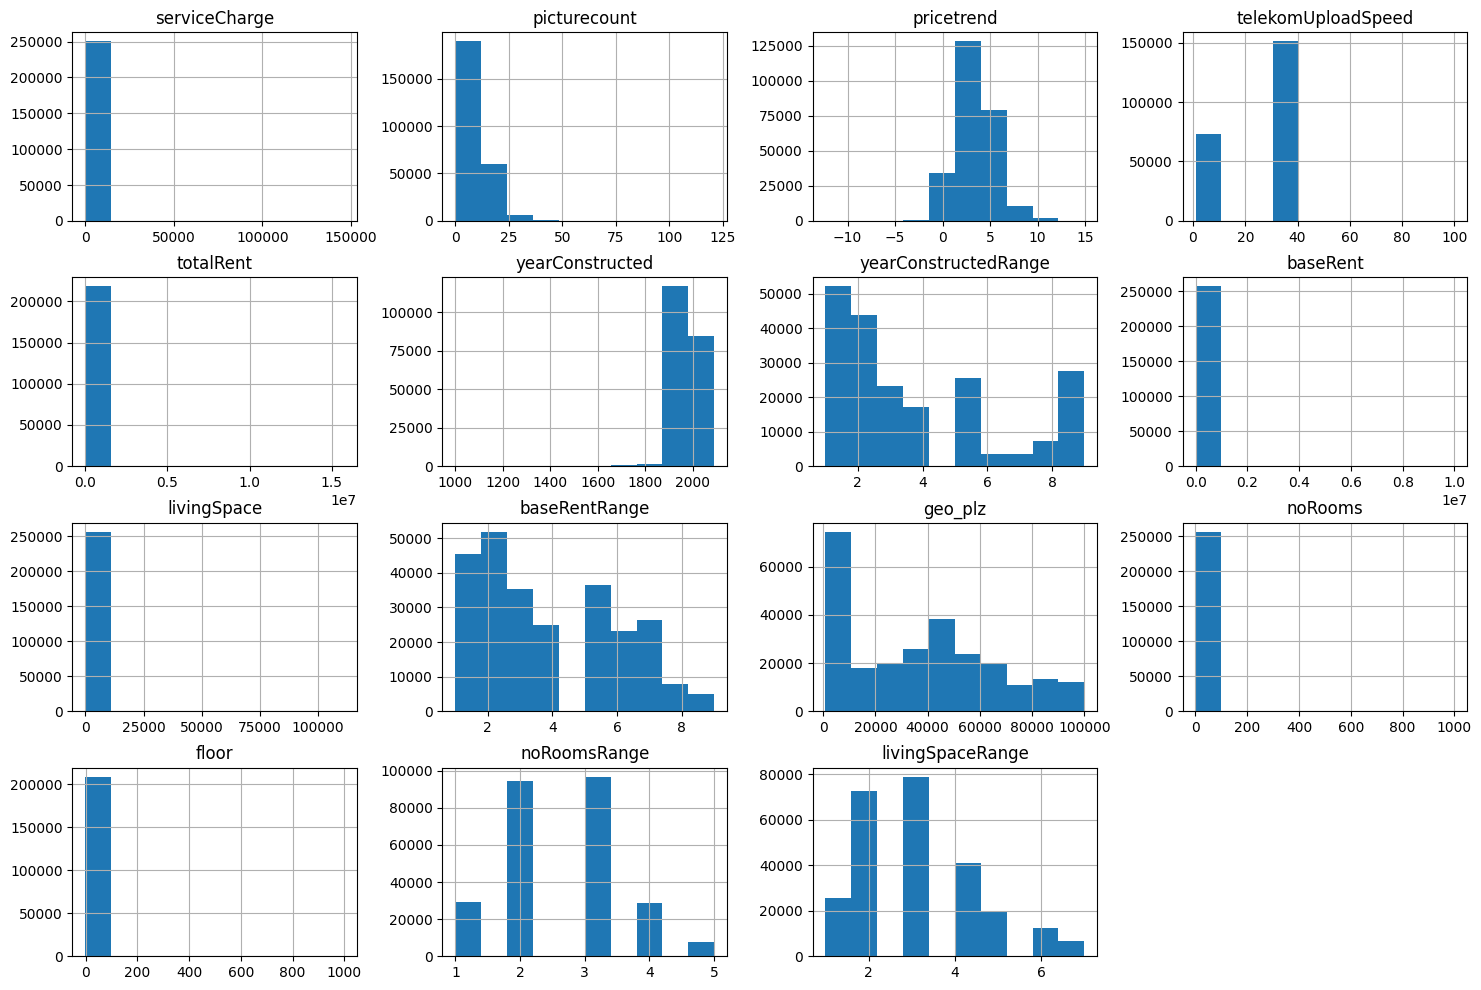

In [52]:
(
    data
    .select_dtypes(include=['number'])
    .hist(figsize=(18, 12))
);

#### serviceCharge

<Axes: >

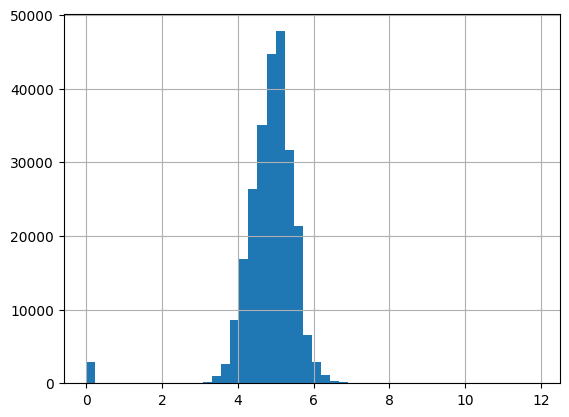

In [53]:
# Applying log transformation to the serviceCharge
(
    data
    .serviceCharge
    .apply(lambda x: np.log1p(x))
    .hist(bins =50)
)

In [54]:
# Applying log transformation to the serviceCharge
data['serviceCharge'] = np.log1p(data['serviceCharge'])

# Fill NA values with mean values
data['serviceCharge'].fillna(data['serviceCharge'].mean(), inplace=True);
(
    data
    .serviceCharge
    .isna()
    .sum()
)

/var/folders/yj/2fr85zvn2sbbpv3jsq4y3kwh0000gn/T/ipykernel_14709/4046236808.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['serviceCharge'].fillna(data['serviceCharge'].mean(), inplace=True);


0

#### yearConstructed

In [55]:
(
    data
    .yearConstructed
    .value_counts()
    .nunique()
)

170

In [56]:
# percentage of null values
(
    data
    .yearConstructed
    .isna()
    .sum()/len(data)*100
).round(3)

20.726

In [57]:
(
    data
    .yearConstructed
    .describe()
)

count    203519.000000
mean       1966.405854
std          47.169460
min        1000.000000
25%        1950.000000
50%        1973.000000
75%        1996.000000
max        2090.000000
Name: yearConstructed, dtype: float64

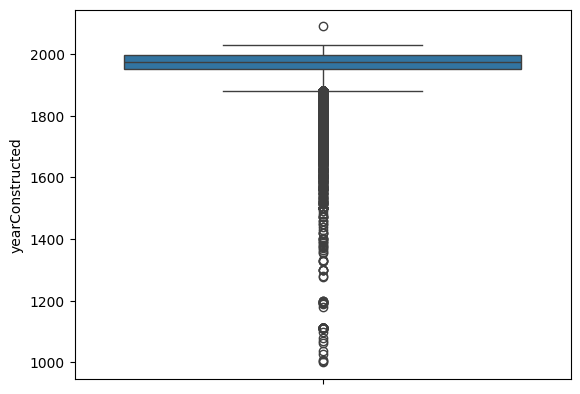

In [58]:
sns.boxplot(data['yearConstructed']);

In [59]:
def percent_of_outliers(data, column):
    # Calculate Q1 and Q3
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate the IQR 
    IQR = Q3 - Q1
    
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    # Calculate the percentage of outliers
    outlier_percentage = (len(outliers) / len(data)) * 100
    
    return outlier_percentage


def remove_outliers(data, column):
    # Calculate Q1 and Q3 
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate the IQR 
    IQR = Q3 - Q1
    
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # remove outliers 
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return filtered_data

In [60]:
outlier_percentage = percent_of_outliers(data, 'yearConstructed')
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

data = remove_outliers(data, 'yearConstructed')

(
    data
    .yearConstructed
    .describe()
)

Percentage of outliers: 1.20%


count    200444.000000
mean       1969.112076
std          37.177061
min        1881.000000
25%        1952.000000
50%        1973.000000
75%        1997.000000
max        2029.000000
Name: yearConstructed, dtype: float64

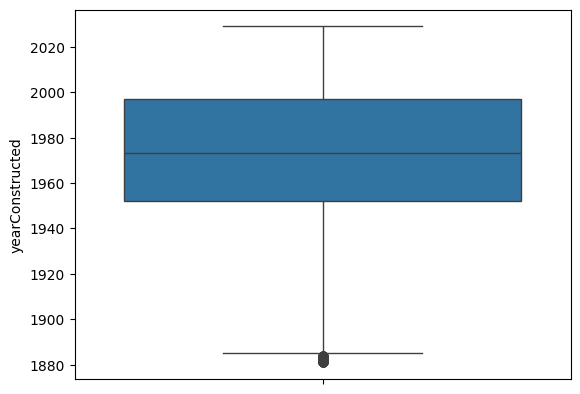

In [61]:
sns.boxplot(data['yearConstructed']);

In [62]:
print(f"median yearConstructed: {np.median(data['yearConstructed'])}")

(
    data
    .yearConstructed
    .isna()
    .sum()
)

median yearConstructed: 1973.0


0

In [63]:
# categoriging the years
bin_edges = [1881, 1952, 1973, 1997, 2030]

# defining the categories names
category_names = ['1881-1952', '1952-1973', '1973-1997', '1997-2030']

# categorize years constructed

data['yearConstructed_category'] = pd.cut(data['yearConstructed'], 
                               bins=bin_edges, 
                               labels=category_names, 
                               right=False) 
# change column type into string
data['yearConstructed_category'] = data['yearConstructed_category'].astype(object)

# droping the old column
data =  data.drop(columns='yearConstructed', axis=1)

# checking the new column
(
    data
    .yearConstructed_category
    .value_counts(normalize=True) * 100
)



yearConstructed_category
1973-1997    25.667019
1997-2030    25.123725
1881-1952    24.937638
1952-1973    24.271617
Name: proportion, dtype: float64

In [64]:
(
    data
    .yearConstructed_category
    .isna()
    .sum()
)

0

#### yearConstructedRange

In [65]:
(
    data
    .yearConstructedRange
    .nunique()
)

9

In [66]:
(
    data
    .yearConstructedRange
    .describe()
)

count    200444.000000
mean          3.760616
std           2.740683
min           1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           9.000000
Name: yearConstructedRange, dtype: float64

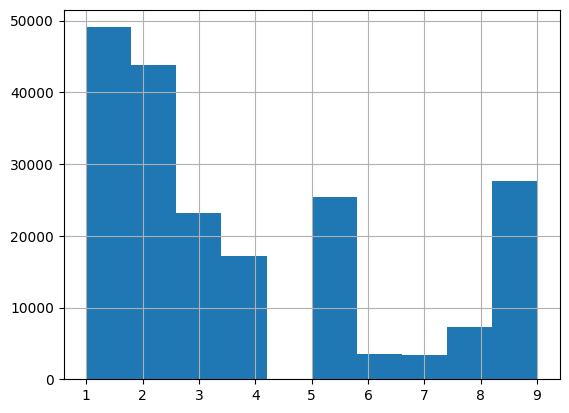

In [67]:
(
    data
    .yearConstructedRange
    .hist()
);

In [68]:
# fillna with median values
data.yearConstructedRange = data.yearConstructedRange.fillna(np.median(data.yearConstructedRange))

# changing data type 
data.yearConstructedRange = data.yearConstructedRange.astype(object)


#### floor 

In [69]:
(
    data
    .floor
    .isna()
    .sum()/ len(data) * 100
)

16.9049709644589

In [70]:
(
    data
    .floor
    .describe()
)

count    166559.000000
mean          2.148590
std           3.084752
min          -1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         650.000000
Name: floor, dtype: float64

<Axes: ylabel='floor'>

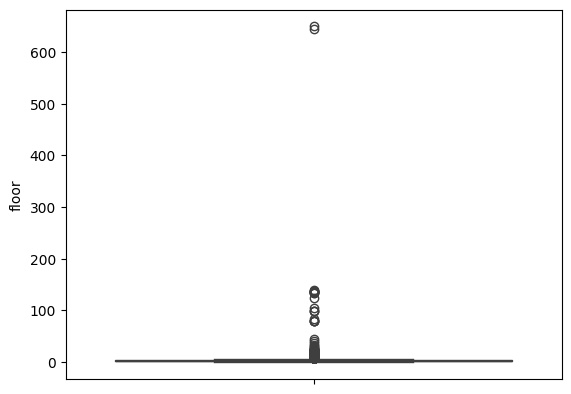

In [71]:
sns.boxplot(data.floor)

In [72]:
# percent of outiers 
outlier_percentage = percent_of_outliers(data, 'floor')
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

Percentage of outliers: 1.39%


In [73]:
# fillna values with median values
data['floor'] = data['floor'].fillna(data['floor'].median())

In [74]:
# Define floor thresholds and category labels
floor_thresholds = [-float('inf'), 0, 3.0, 5.0, 45.0, float('inf')]
floor_labels = ['ground_floor_and_below', 'floor_0_3', 'floor_4_5', 'floor_6_45', 'floor_above_45']

# Categorize the 'floor' column using defined bins and labels
data['floor_category'] = pd.cut(
    data['floor'], 
    bins=floor_thresholds, 
    labels=floor_labels
)

# Display category counts
category_counts = data['floor_category'].value_counts()
print(category_counts)


floor_category
floor_0_3                 153858
floor_4_5                  22059
ground_floor_and_below     19606
floor_6_45                  4899
floor_above_45                22
Name: count, dtype: int64


In [75]:
#change datatype 
data['floor_category'] = data['floor_category'].astype(object)

# drop old column
data =  data.drop(columns='floor', axis=1)

#### totalRent

In [76]:
(
    data
    .totalRent
    .isna()
    .sum()/ len(data) * 100
)

15.391830137095647

In [77]:
(
    data
    .totalRent
    .describe()
)

count    1.695920e+05
mean     9.251413e+02
std      3.827105e+04
min      0.000000e+00
25%      4.702400e+02
50%      6.550000e+02
75%      1.000000e+03
max      1.575154e+07
Name: totalRent, dtype: float64

<Axes: ylabel='totalRent'>

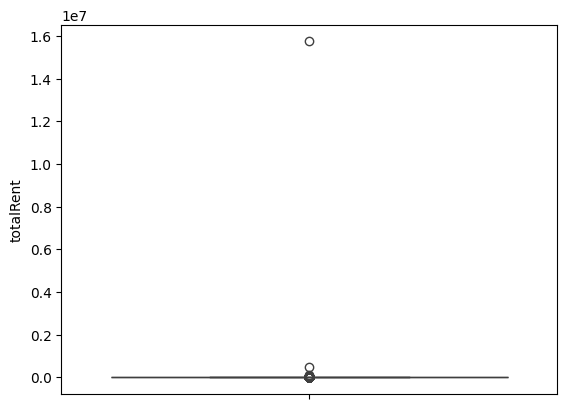

In [78]:
sns.boxplot(data.totalRent)

In [79]:
# Percentage of outliers
outlier_percentage = percent_of_outliers(data, 'totalRent')
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

Percentage of outliers: 4.57%


<Axes: ylabel='totalRent'>

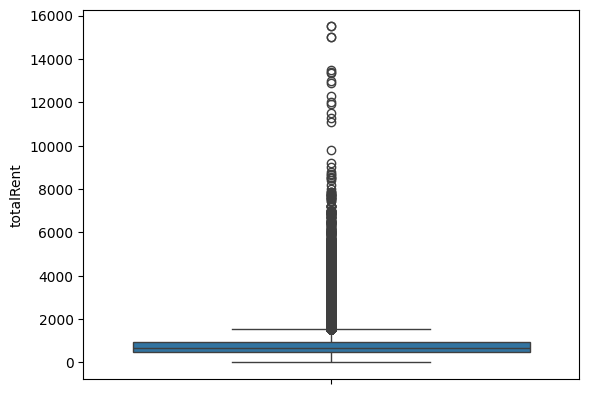

In [80]:
# Remove the top 10 maximum values from 'totalRent' column
top_10_max_values = data['totalRent'].nlargest(10)
data = data[~data['totalRent'].isin(top_10_max_values)]

# fillna values with median values
data['totalRent'] = data['totalRent'].fillna(data['totalRent'].median())

# Create the boxplot for the cleaned data
sns.boxplot(data['totalRent'])



#### pricetrend

In [81]:
(
    data
    .pricetrend
    .isna()
    .sum()/len(data)*100
)

0.7254258259576718

<Axes: xlabel='pricetrend'>

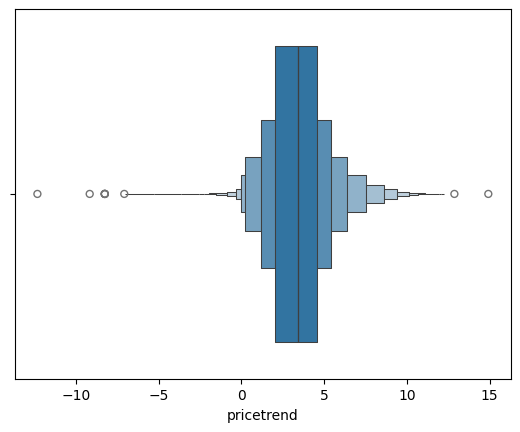

In [82]:
sns.boxenplot(x = data['pricetrend'])

In [83]:
# perecent of outliers
outlier_percentage = percent_of_outliers(data, 'pricetrend')
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

Percentage of outliers: 2.02%


In [84]:
# mean and median values
mean_price_trend = data['pricetrend'].mean()
median_price_trend = data['pricetrend'].median()

print(f"median_price_trend = {median_price_trend}")
print(f"mean_price_trend = {mean_price_trend}")

median_price_trend = 3.39
mean_price_trend = 3.421149814051664


In [85]:
# fillna values with median values
data['pricetrend'] = data['pricetrend'].fillna(median_price_trend)

#### pictureCount

In [86]:
(
    data
    .picturecount
    .isna()
    .sum()/len(data) * 100
)

0.0

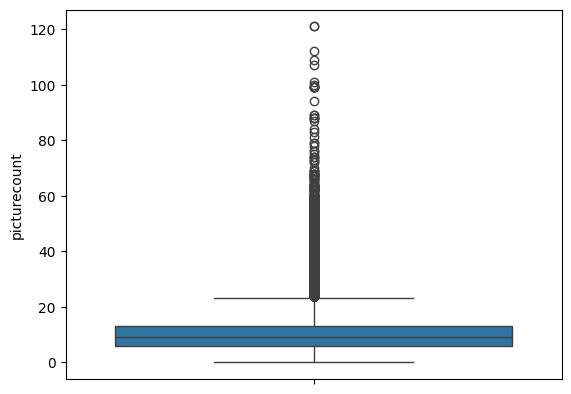

In [87]:
sns.boxplot(data['picturecount']);

#### baseRent

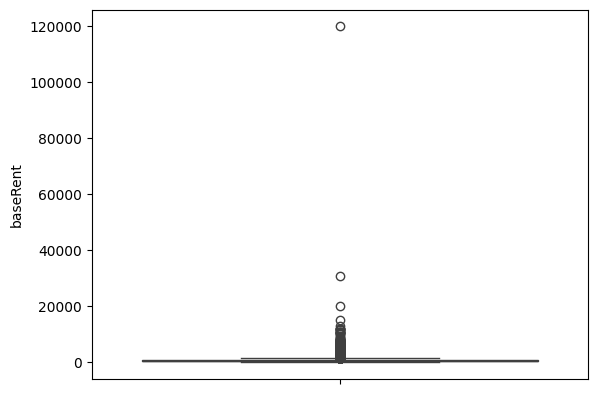

In [88]:
sns.boxplot(data['baseRent']);

In [89]:
# percent of outliers
outlier_percentage = percent_of_outliers(data, 'baseRent')
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

Percentage of outliers: 5.28%


<Axes: ylabel='baseRent'>

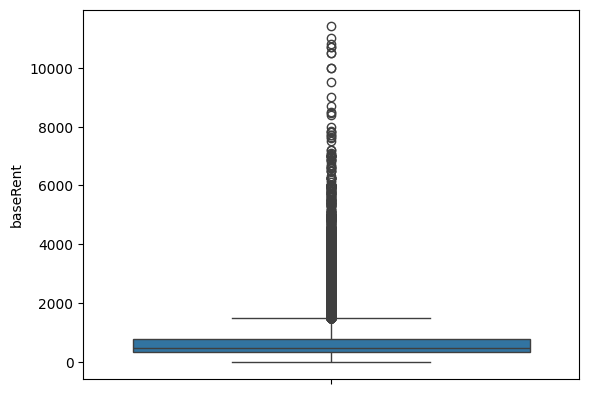

In [90]:
# fillna values with median values
data['baseRent'] = data['baseRent'].fillna(np.median(data['totalRent']))

# Remove the top 10 maximum values from 'baseRent' column
top_10_max_values = data['baseRent'].nlargest(10)
data = data[~data['baseRent'].isin(top_10_max_values)]

# Create the boxplot for the cleaned data
sns.boxplot(data['baseRent'])

#### livingSpace

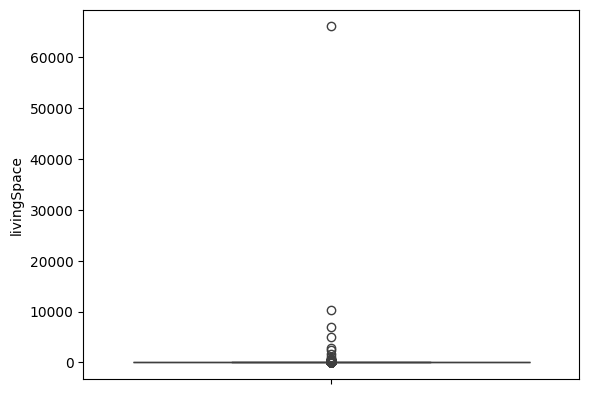

In [91]:
sns.boxplot(data['livingSpace']);

<Axes: ylabel='livingSpace'>

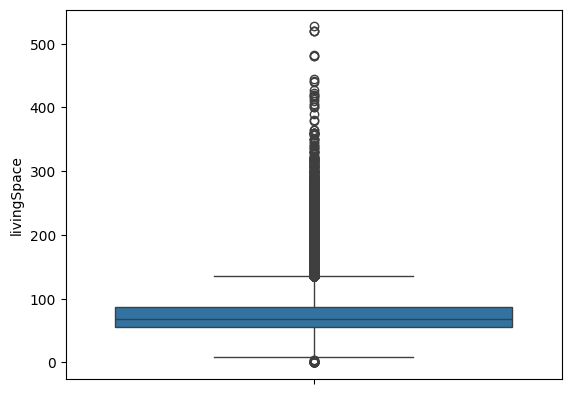

In [92]:
# fillna values with median values
data['livingSpace'] = data['livingSpace'].fillna(np.median(data['livingSpace']))

# Remove the top 10 maximum values from 'baseRent' column
top_10_max_values = data['livingSpace'].nlargest(10)
data = data[~data['livingSpace'].isin(top_10_max_values)]

# Create the boxplot for the cleaned data
sns.boxplot(data['livingSpace'])

#### baseRentRange

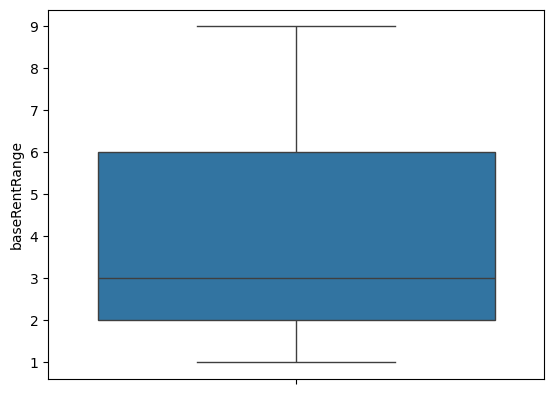

In [93]:
sns.boxplot(data['baseRentRange']);

#### telekomUploadSpeed

In [94]:
(
    data
    .telekomUploadSpeed
    .isna()
    .sum()/len(data) * 100
)

12.661790094504378

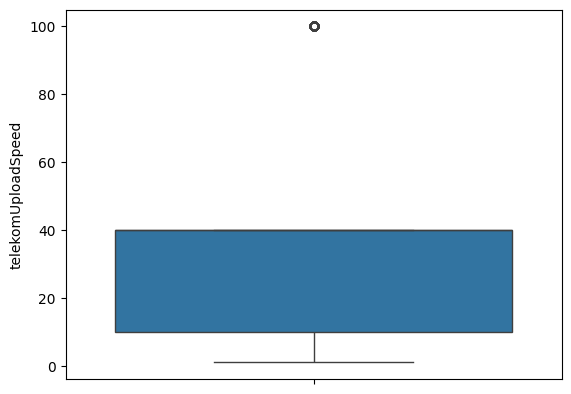

In [95]:
sns.boxplot(data['telekomUploadSpeed']);

<Axes: ylabel='telekomUploadSpeed'>

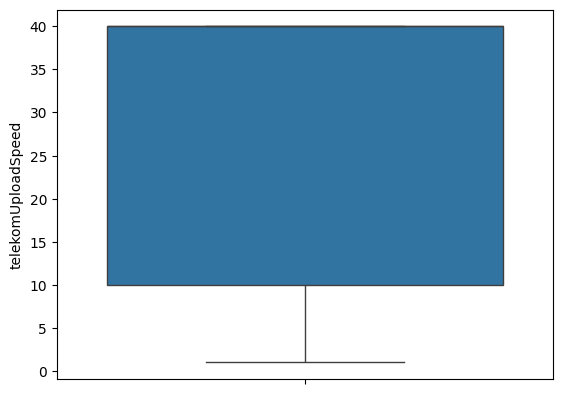

In [96]:
# Remove the top 10 maximum values from 'baseRent' column
top_10_max_values = data['telekomUploadSpeed'].nlargest(1)
data = data[~data['telekomUploadSpeed'].isin(top_10_max_values)]


# fillna values with median values
data['telekomUploadSpeed'] = data['telekomUploadSpeed'].fillna(data['telekomUploadSpeed'].median())

# Create the boxplot for the cleaned data
sns.boxplot(data['telekomUploadSpeed'])

#### geo_plz

In [97]:
(
    data
    .geo_plz
    .head(10)
)

0     44269
2      1097
3      9599
4     28213
5     24891
7     28717
8     79211
9     45888
11     9669
12    76833
Name: geo_plz, dtype: int64

In [98]:
four_digit_values = data[data['geo_plz'].astype(str).str.len() == 4]
print(len(four_digit_values)/len(data))

0.26651688759080355


In [99]:
# Adding a leading zero
data['geo_plz'] = data['geo_plz'].astype(str).str.zfill(5)

# Verify transformation
print(data['geo_plz'].head())

0    44269
2    01097
3    09599
4    28213
5    24891
Name: geo_plz, dtype: object


In [100]:
# changing the datatype
data['geo_plz'] = data['geo_plz'].astype('object')

#### noRooms

<Axes: ylabel='noRooms'>

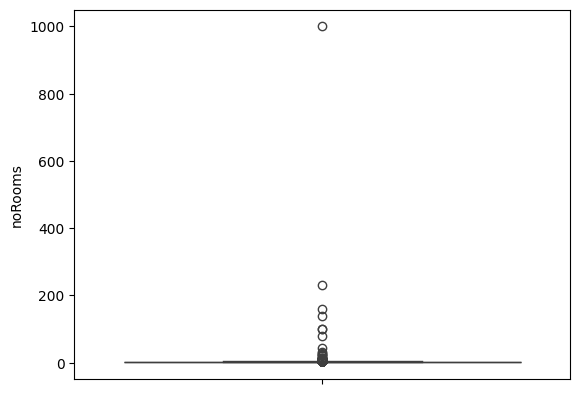

In [106]:
sns.boxplot(data['noRooms'])

<Axes: ylabel='noRooms'>

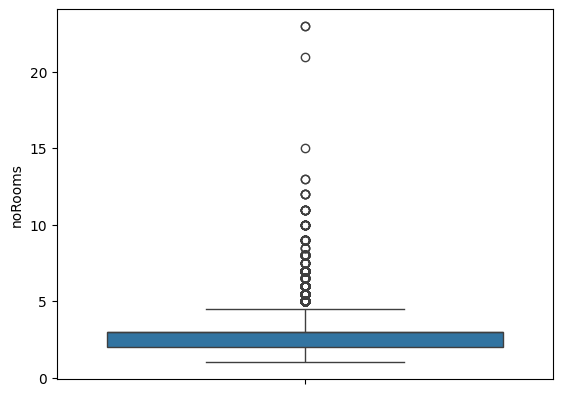

In [108]:
# Remove the top 10 maximum values from 'baseRent' column
top_10_max_values = data['noRooms'].nlargest(10)
data = data[~data['noRooms'].isin(top_10_max_values)]


# fillna values with median values
data['noRooms'] = data['noRooms'].fillna(data['noRooms'].median())

# Create the boxplot for the cleaned data
sns.boxplot(data['noRooms'])

In [112]:
# changing datatype
data['noRooms'] = data['noRooms'].astype('int').astype('object')

#### livingSpaceRange

<Axes: ylabel='livingSpaceRange'>

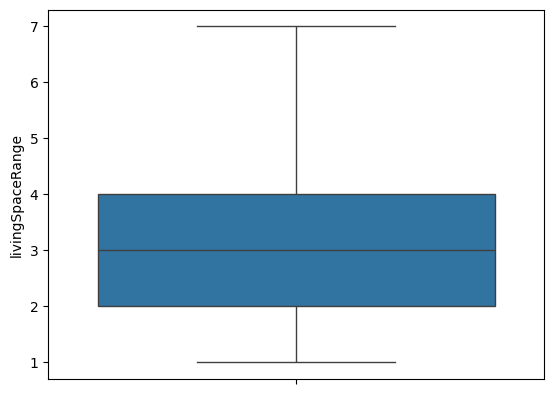

In [119]:
sns.boxplot(data['livingSpaceRange'])

In [121]:
data['livingSpaceRange'] = data['livingSpaceRange'].astype('int').astype('object')

#### livingSpace

<Axes: ylabel='livingSpace'>

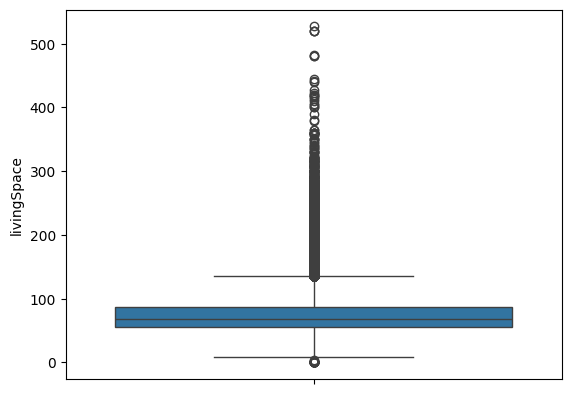

In [122]:
sns.boxplot(data['livingSpace'])

In [125]:
# percentage of outliers
outlier_percentage = percent_of_outliers(data, 'livingSpace')
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

Percentage of outliers: 4.25%


In [126]:
(
    data
    .livingSpace
    .describe()
)

count    200225.000000
mean         73.682346
std          31.117045
min           1.000000
25%          55.000000
50%          67.690000
75%          87.000000
max         400.000000
Name: livingSpace, dtype: float64

In [127]:
# living space can not be less than 1
data = data[data['livingSpace'] >= 1]

<Axes: ylabel='livingSpace'>

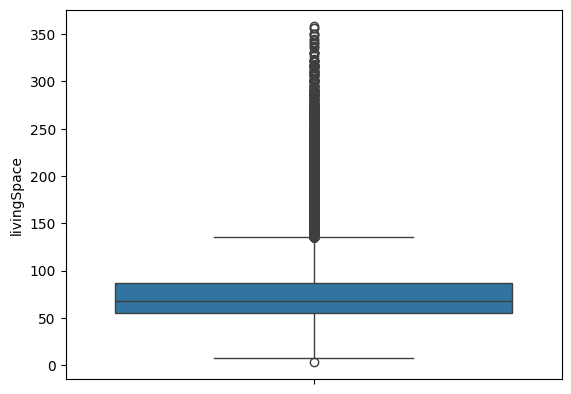

In [129]:
# fillna values with median values
data['livingSpace'] = data['livingSpace'].fillna(data['livingSpace'].median())

# Create the boxplot for the cleaned data
sns.boxplot(data['livingSpace'])

In [130]:
data.head(30)

,stateName,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,firingTypes,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,garden,livingSpaceRange,cityName,cityDistrict,yearConstructed_category,floor_category
0,Nordrhein_Westfalen,5.505332,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.00,oil,False,True,2.0,595.00,86.00,well_kept,normal,unknown,False,4,ground_floor,44269,4,True,4,Dortmund,Schüren,1952-1973,floor_0_3
2,Sachsen,5.545177,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.00,district_heating,False,True,9.0,965.00,83.80,first_time_use,sophisticated,unknown,True,6,apartment,01097,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,1997-2030,floor_0_3
3,Sachsen,4.080077,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,655.00,district_heating,False,False,2.0,343.00,58.15,unknown,unknown,unknown,False,2,other,09599,3,False,2,Mittelsachsen_Kreis,Freiberg,1952-1973,floor_0_3
4,Bremen,4.934474,self_contained_central_heating,unknown,False,True,19,2.46,40.0,903.00,gas,False,False,1.0,765.00,84.97,refurbished,unknown,unknown,False,5,apartment,28213,3,False,4,Bremen,Neu_Schwachhausen,1881-1952,floor_0_3
5,Schleswig_Holstein,4.962845,gas_heating,unknown,False,True,5,4.48,2.4,655.00,gas,True,False,5.0,315.20,53.43,well_kept,unknown,no,False,2,apartment,24891,2,False,2,Schleswig_Flensburg_Kreis,Struxdorf,1997-2030,floor_0_3
7,Bremen,4.488636,central_heating,ONE_YEAR_FREE,False,True,5,1.89,2.4,584.25,gas:electricity,False,True,2.0,452.25,60.30,unknown,unknown,unknown,False,3,ground_floor,28717,3,False,2,Bremen,St._Magnus,1952-1973,floor_0_3
8,Baden_Württemberg,4.709530,oil_heating,ONE_YEAR_FREE,False,False,5,3.77,40.0,690.00,oil,True,True,2.0,580.00,53.00,well_kept,sophisticated,no,False,4,roof_storey,79211,2,False,2,Emmendingen_Kreis,Denzlingen,1952-1973,floor_0_3
9,Nordrhein_Westfalen,4.564348,self_contained_central_heating,ONE_YEAR_FREE,False,False,7,1.92,40.0,655.00,gas,False,True,2.0,300.00,60.00,well_kept,normal,negotiable,False,1,apartment,45888,2,False,2,Gelsenkirchen,Bulmke_Hüllen,1952-1973,floor_0_3
11,Sachsen,5.049856,central_heating,ONE_YEAR_FREE,False,False,9,0.98,2.4,555.00,gas,False,True,1.0,400.00,80.00,well_kept,normal,negotiable,False,2,apartment,09669,3,True,3,Mittelsachsen_Kreis,Frankenberg/Sachsen,1881-1952,floor_0_3
12,Rheinland_Pfalz,5.602119,oil_heating,unknown,False,False,4,2.77,2.4,920.00,district_heating,False,False,1.0,650.00,100.00,mint_condition,sophisticated,no,False,5,ground_floor,76833,4,True,4,Südliche_Weinstraße_Kreis,Frankweiler,1881-1952,floor_0_3


In [131]:
data.shape

(200206, 30)

In [132]:
data.isna().sum()

stateName                   0
serviceCharge               0
heatingType                 0
telekomTvOffer              0
newlyConst                  0
balcony                     0
picturecount                0
pricetrend                  0
telekomUploadSpeed          0
totalRent                   0
firingTypes                 0
hasKitchen                  0
cellar                      0
yearConstructedRange        0
baseRent                    0
livingSpace                 0
condition                   0
interiorQual                0
petsAllowed                 0
lift                        0
baseRentRange               0
typeOfFlat                  0
geo_plz                     0
noRooms                     0
garden                      0
livingSpaceRange            0
cityName                    0
cityDistrict                0
yearConstructed_category    0
floor_category              0
dtype: int64

## 5 Export cleaned data

In [135]:
def export_dataframe(dataframe, file_name):
    # Define the path where the CSV will be saved
    path = '/Users/sudhirjoon/Library/Mobile Documents/com~apple~CloudDocs/Uni_Mannheim/Sem2/Machine Learning zoomcamp/MLZoomcamp/Midterm Project/German Real State Project/Data'
    
    # Ensure the directory exists
    os.makedirs(path, exist_ok=True)
    
    # Create the full file path
    file_path = os.path.join(path, file_name)
    
    # Export the dataframe to CSV
    dataframe.to_csv(file_path, index=False)
    
    print(f"DataFrame exported to: {file_path}")


In [136]:
export_dataframe(data, 'cleaned_data.csv')

DataFrame exported to: /Users/sudhirjoon/Library/Mobile Documents/com~apple~CloudDocs/Uni_Mannheim/Sem2/Machine Learning zoomcamp/MLZoomcamp/Midterm Project/German Real State Project/Data/cleaned_data.csv
